# **Relación de políticas con Gasto de FONDES**

La Comisión Multisectorial del FONDES es el órgano encargado de la priorización de los proyectos de inversión, reforzamientos y demás inversiones ante la ocurrencia de fenómenos naturales y antrópicos, a ser financiados con cargo a recursos del FONDES. Dicha Comisión Multisectorial es de naturaleza permanente y se encuentra adscrita al Ministerio de Economía y Finanzas.


Elaborado por el Ministerio de Economía y Finanzas extraída desde el año 2017 hasta el 2022: https://www.datosabiertos.gob.pe/dataset/gasto-del-fondo-para-intervenciones-ante-la-ocurrencia-de-desastres-naturales-fondes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importar librerias
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

De las Bases obtenidas desde el año 2017 al 2022 solo se han escogido las siguientes variables:
<p></p>
<p></p>

<table>
  <tr>
    <th>Nombre Variable</th>
    <th>Descripcion </th>
  </tr>
  <tr>
    <td>Key</td>
    <td>Es la combinación del nombre de la REGION, PROVINCIA, DISTRITO y el Año en que aparece en el dataset</td>
  </tr>
  <tr>
    <td>Contador</td>
    <td>Conteo de todos los proyectos financiados por FONDES por cada RPDA</td>
  </tr>
  <tr>
    <td>MONTO_DEVENGADO</td>
    <td>Monto total devengado por los proyectos por cada RPDA</td>
  </tr>

In [59]:
# Descarga de datos de 2017 a 2022
for i in range(2017,2023):
  filename = "/content/drive/MyDrive/Hackathon Girls 💅/TRABAJO PARCIAL/Base de Datos ORIGINAL/Políticas/"+str(i)+"-Gasto-FONDES-consolidada.csv"
  df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
  df = df[["ANO_EJE","DEPARTAMENTO_EJECUTORA_NOMBRE","PROVINCIA_EJECUTORA_NOMBRE","DISTRITO_EJECUTORA_NOMBRE","MONTO_DEVENGADO"]]
  df.rename(columns=lambda x:"YEAR" if x=="AÑO" else x, inplace=True)
  df.rename(columns=lambda x:"REGION" if x=="DEPARTAMENTO_EJECUTORA_NOMBRE" else x, inplace=True)
  df.rename(columns=lambda x:"PROVINCIA" if x=="PROVINCIA_EJECUTORA_NOMBRE" else x, inplace=True)
  df.rename(columns=lambda x:"DISTRITO" if x=="DISTRITO_EJECUTORA_NOMBRE" else x, inplace=True)

  #GROUPBY
  df["Contador"]=1
  df["Key"]=df["REGION"]+df["PROVINCIA"]+df["DISTRITO"]+str(i)
  grupo1=df[["Key","REGION","PROVINCIA","DISTRITO","Contador"]].groupby("Key").sum()
  grupo2=df[["Key","MONTO_DEVENGADO"]].groupby("Key").mean()
  df1=df[["Key","REGION","PROVINCIA","DISTRITO"]].copy()

  df = pd.merge(grupo1, grupo2, how="inner", on="Key")
  df["Contador"]=round(df["Contador"],0)
  df["Contador"]=df["Contador"].astype(int)
  df["MONTO_DEVENGADO"]=df["MONTO_DEVENGADO"].astype(float)
  df["Key"]=df.index
  df = df.drop(df.index[0])
  df = df.reset_index(drop=True)
  df = pd.merge(df, df1, how="inner", on="Key")
  name = "Gasto_proyecto"+str(i)+".csv"
  df.to_csv(name,index=False)

In [60]:
# Carga de Datasets
filename = "/content/Gasto_proyecto2017.csv"
df_2017 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Gasto_proyecto2018.csv"
df_2018 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Gasto_proyecto2019.csv"
df_2019 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Gasto_proyecto2020.csv"
df_2020 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Gasto_proyecto2021.csv"
df_2021 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Gasto_proyecto2022.csv"
df_2022 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')

In [61]:
# Concatenación de los DataBase del año 2017 al 2022
df_concat = pd.concat([df_2017,df_2018,df_2019,df_2020,df_2021,df_2022],axis=0)
df_concat.head()

,Contador,MONTO_DEVENGADO,Key,REGION,PROVINCIA,DISTRITO
0,3,214244.04,ANCASHAIJAAIJA2017,ANCASH,AIJA,AIJA
1,3,214244.04,ANCASHAIJAAIJA2017,ANCASH,AIJA,AIJA
2,3,214244.04,ANCASHAIJAAIJA2017,ANCASH,AIJA,AIJA
3,1,100000.00,ANCASHAIJACORIS2017,ANCASH,AIJA,CORIS
4,1,98903.00,ANCASHAIJAHUACLLAN2017,ANCASH,AIJA,HUACLLAN


In [62]:
# Dimensión de la Base de Datos del 2017 - 2022
print("Total de combinación de los distritos que han registrado proyectos con FONDES durante 6 años: ",df_concat.shape[0])
print("Cantidad de variables extraídas: ",df_concat.shape[1])

Total de combinación de los distritos que han registrado proyectos con FONDES durante 6 años:  9557
Cantidad de variables extraídas:  6


In [63]:
# Descarga de archivo
df_concat.to_csv("df_proyectoFondes.csv",index=False)

## **Análisis de gráficos**

In [66]:
# Importa algunas librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Análisis por regiones
grupo1 = df_concat.groupby("REGION").sum()

# Ordena los registros en orden descendente segun la columna Total
grupo1.sort_values(by='Contador',ascending=False, inplace=True)

# Obtiene los top 10 paises que mas inmigrantes aportan
df_top10 = grupo1.head(10)
df_top10.sort_values(by='Contador',ascending=True, inplace=True)
df_top10 = df_top10["Contador"].copy()
df_top10

REGION
ICA               771
AREQUIPA          821
HUANCAVELICA     1324
AYACUCHO         1862
CAJAMARCA        2471
LAMBAYEQUE       3485
LIMA             3867
ANCASH           5352
LA LIBERTAD      8483
PIURA           11253
Name: Contador, dtype: int64

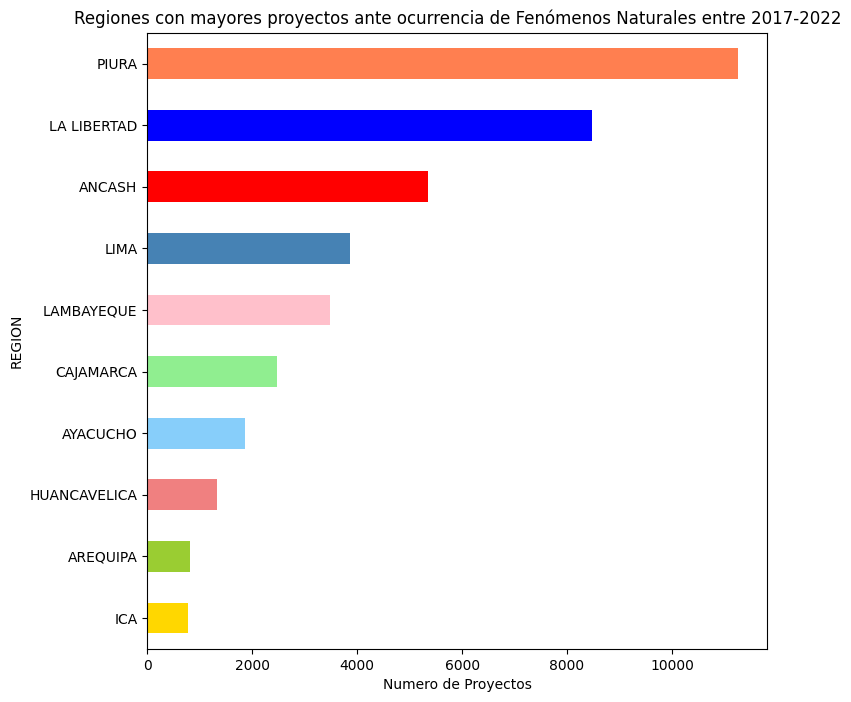

In [73]:
# genera el plot de barras horizontales
colores = ["#ffd700","#9acd32","#f08080","#87cefa","#90ee90","#ffc0cb","#4682b4","#ff0000","#0000ff","#ff7f50"]
df_top10.plot(kind='barh', figsize=(8, 8), color=colores)
plt.xlabel('Numero de Proyectos')
plt.title('Regiones con MAYORES proyectos ante ocurrencia de Fenómenos Naturales entre 2017-2022')
plt.show()

In [75]:
# Análisis por regiones
grupo2 = df_concat.groupby("REGION").sum()

# Ordena los registros en orden descendente segun la columna Total
grupo2.sort_values(by='Contador',ascending=True, inplace=True)

# Obtiene los top 10 paises que mas inmigrantes aportan
df_top10 = grupo2.head(10)
df_top10.sort_values(by='Contador',ascending=False, inplace=True)
df_top10 = df_top10["Contador"].copy()
df_top10

REGION
PASCO                                  78
MOQUEGUA                               77
AMAZONAS                               65
PUNO                                   63
CUSCO                                  29
TACNA                                  20
UCAYALI                                10
APURIMAC                               10
MADRE DE DIOS                           6
PROVINCIA CONSTITUCIONAL DEL CALLAO     4
Name: Contador, dtype: int64

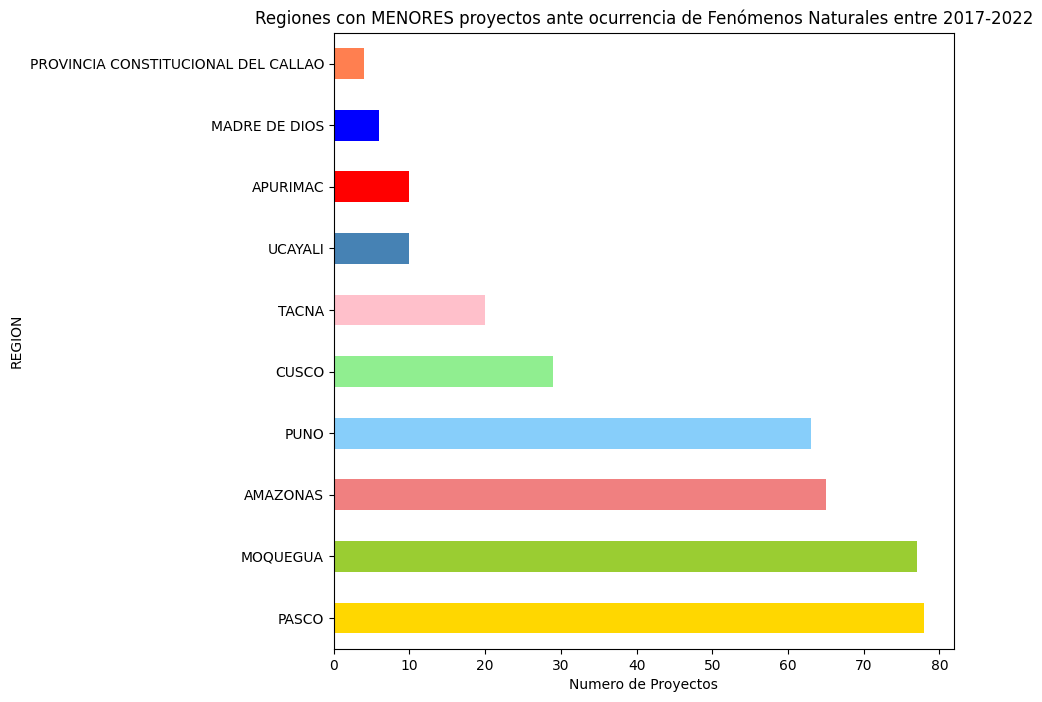

In [76]:
# genera el plot de barras horizontales
colores = ["#ffd700","#9acd32","#f08080","#87cefa","#90ee90","#ffc0cb","#4682b4","#ff0000","#0000ff","#ff7f50"]
df_top10.plot(kind='barh', figsize=(8, 8), color=colores)
plt.xlabel('Numero de Proyectos')
plt.title('Regiones con MENORES proyectos ante ocurrencia de Fenómenos Naturales entre 2017-2022')
plt.show()